# Overview
During our project, our team focused on the Youtube Trending Video Analysis within United States. Social media has taken a vital role in people’s lives today. Among all the social media platforms, Youtube is one of the biggest platforms that most people use. We wanted to find out what videos people are most interested in and how these trending videos are categorized. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import seaborn as sns
import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [9]:
#  Where is the file?
!pwd

/c/Users/Lenovo/Desktop/Youtube_Data_Visiualization/notebook


In [11]:
# Reading the dataset
df = pd.read_csv("../data_input/US_youtube_trending_data.csv")
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [12]:
# Data cleaning
df["description"] = df["description"].fillna(value="")

In [13]:
# See some information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167990 entries, 0 to 167989
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           167990 non-null  object
 1   title              167990 non-null  object
 2   publishedAt        167990 non-null  object
 3   channelId          167990 non-null  object
 4   channelTitle       167990 non-null  object
 5   categoryId         167990 non-null  int64 
 6   trending_date      167990 non-null  object
 7   tags               167990 non-null  object
 8   view_count         167990 non-null  int64 
 9   likes              167990 non-null  int64 
 10  dislikes           167990 non-null  int64 
 11  comment_count      167990 non-null  int64 
 12  thumbnail_link     167990 non-null  object
 13  comments_disabled  167990 non-null  bool  
 14  ratings_disabled   167990 non-null  bool  
 15  description        167990 non-null  object
dtypes: bool(2), int64(5)

In [14]:
# Describtion of numerical columns
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,167990.00,167990.00,167990.00,167990.00,167990.00
mean,18.81,2560494.51,135410.11,1814.86,11474.09
std,6.77,7149582.25,417471.13,10118.32,87143.97
min,1.00,0.00,0.00,0.00,0.00
25%,17.00,486456.00,19416.00,0.00,1369.00
50%,20.00,993610.50,45166.50,241.00,3075.00
75%,24.00,2248705.25,113295.50,1095.00,7366.00
max,29.00,277791741.00,16021534.00,879354.00,6738537.00


In [15]:
# Displaying dataset
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167985,NBBa1rqfy-k,RECORD 77 INCH SNOWFALL swamps Buffalo Bills s...,2022-11-19T21:00:07Z,UCV6hWxB0-u_IX7e-h4fEBAw,Reed Timmer,25,2022-11-25T00:00:00Z,tornado|stormchasing|live weather|live weather...,544249,7694,0,1281,https://i.ytimg.com/vi/NBBa1rqfy-k/default.jpg,False,False,Huge 77 snowfall from record-breaking lake eff...
167986,aDcW_lC1P6w,Twins Blind Dating 7 Guys Based on Their Outfits,2022-11-19T21:38:52Z,UCWb0O7gdabdhZd62xiHTp0Q,David Alvareeezy,23,2022-11-25T00:00:00Z,twins|montoya twinz|montoya twins|montoya mob|...,992482,53447,0,2038,https://i.ytimg.com/vi/aDcW_lC1P6w/default.jpg,False,False,I got the Montoya Twins to Blind Date 7 Guys B...
167987,TslxkNMCdUk,Casper Magico & Anuel AA & Bryant Myers ft. Yo...,2022-11-17T23:00:21Z,UCRI7hheejBbWS6etTNwMT0g,Anuel AA,10,2022-11-25T00:00:00Z,Anuel AA|anuel|Free anuel|Emmanuel|Real hasta ...,3786806,234675,0,11042,https://i.ytimg.com/vi/TslxkNMCdUk/default.jpg,False,False,Casper Magico & Anuel AA & Bryant Myers ft. Yo...
167988,VPChG5IVllY,Fuerza Regida - Prefiero Empedarme - (Official...,2022-11-18T01:07:17Z,UCFLI6KAjrKRtydD7KqiYvAw,FUERZA REGIDA,10,2022-11-25T00:00:00Z,[None],1622197,47525,0,870,https://i.ytimg.com/vi/VPChG5IVllY/default.jpg,False,False,CRYPTO ARENA - NOV 23 https://www.ticketmaster...


,year,No_of_videos
0,2021,74595
1,2022,65799
2,2020,27596


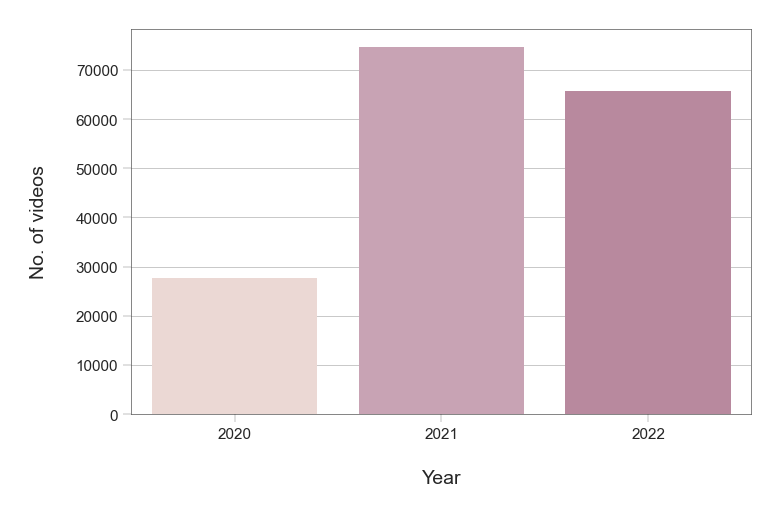

In [16]:
# Dataset collection years
cdf = df["trending_date"].apply(lambda x: x[:4]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#EFD5D0', '#CE9DB3','#C0819D'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")
cdf

In [17]:
# Percentage of videos by year
df["trending_date"].apply(lambda x: x[:4]).value_counts(normalize=True)

2021   0.44
2022   0.39
2020   0.16
Name: trending_date, dtype: float64

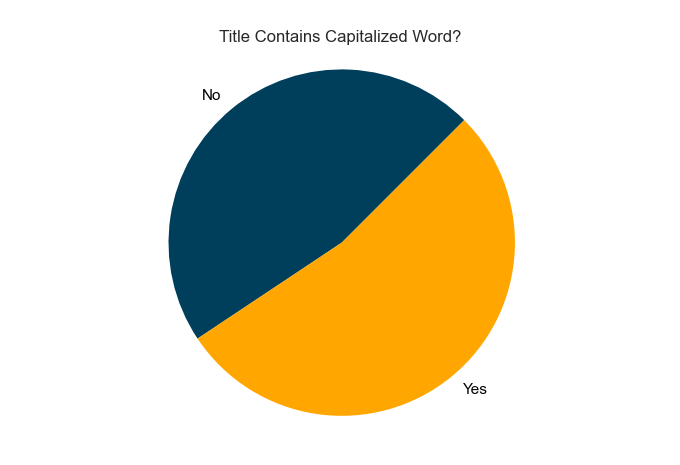

In [18]:
# How many trending video titles contain at least a capitalized word ？
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [19]:
# Percentage of videos with titles that contain capitalized words
df["contains_capitalized"].value_counts(normalize=True)

True    0.53
False   0.47
Name: contains_capitalized, dtype: float64

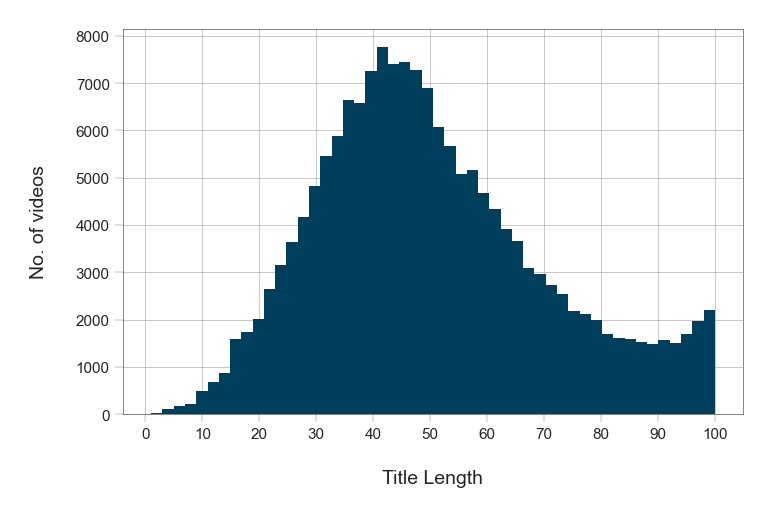

In [22]:
# The lengths of trending video titles
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

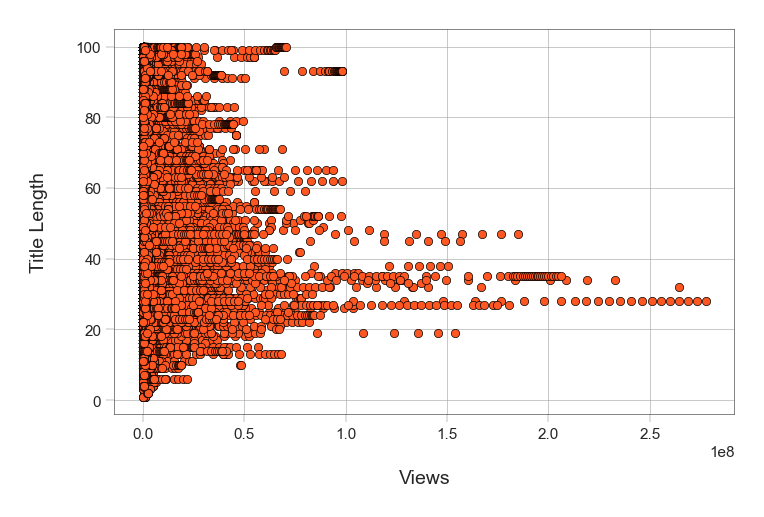

In [23]:
# Drawing a scatter plot between title length and number of views
# The relationship between title length and number of views
fig, ax = plt.subplots()
_ = ax.scatter(x=df['view_count'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

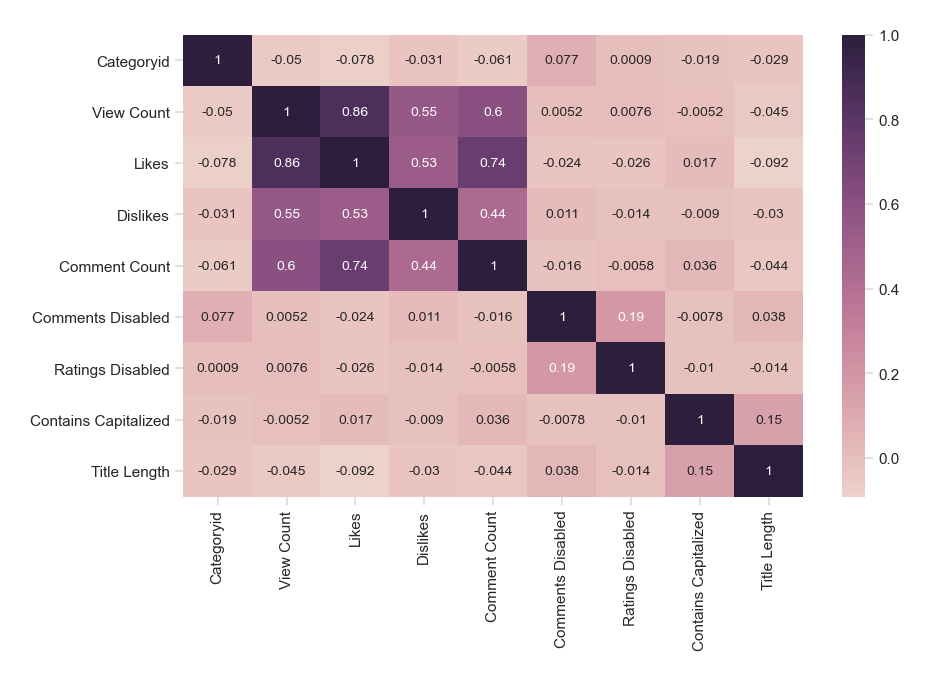

In [24]:
# Correlation map of our dataset variables
# Highly positively correlated between : Views and Likes , Likes and Comment Count, Dislikes and Comment
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

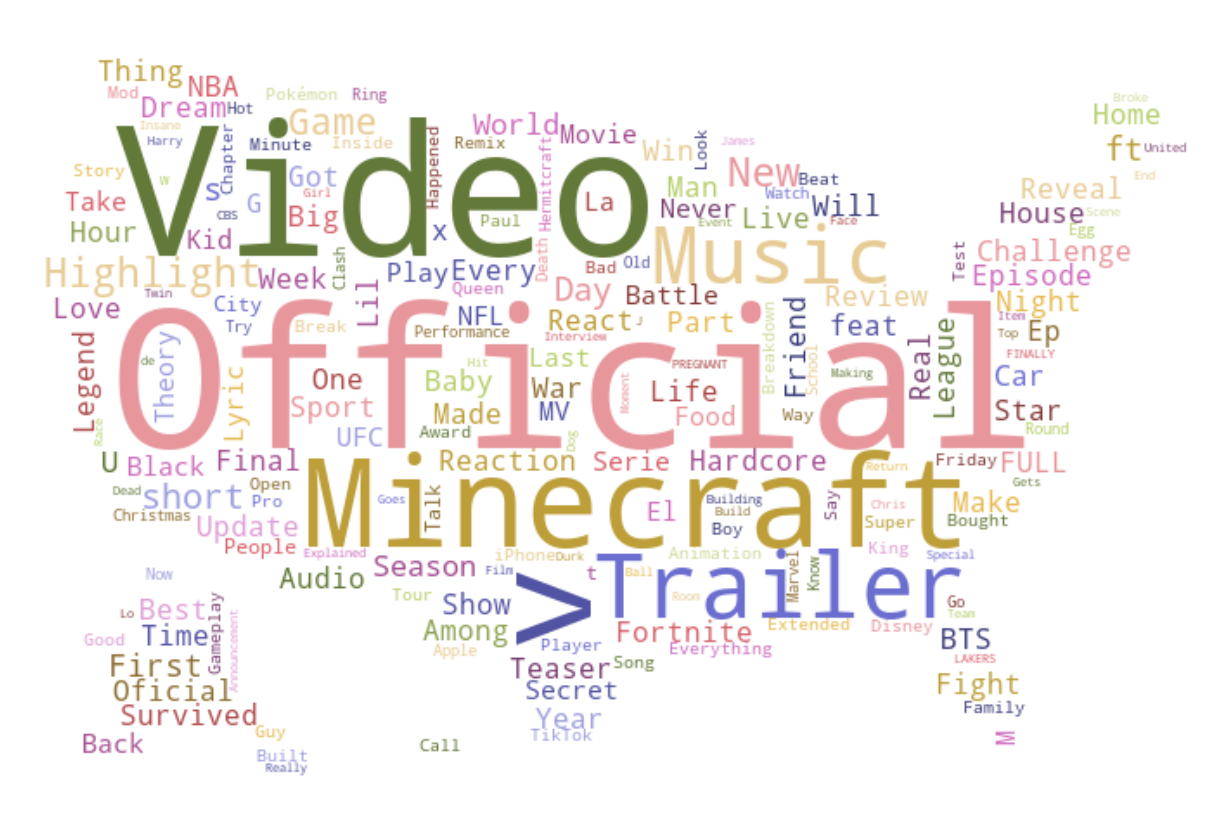

In [26]:
# Drawing a word cloud for titles
# The more common the word is, the bigger its font size is
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
# Creating the mask
usa_mask = np.array(Image.open('../data_input/USA-map.jpg'))
# Creating a word cloud with the shape of US
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         mask=usa_mask,colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

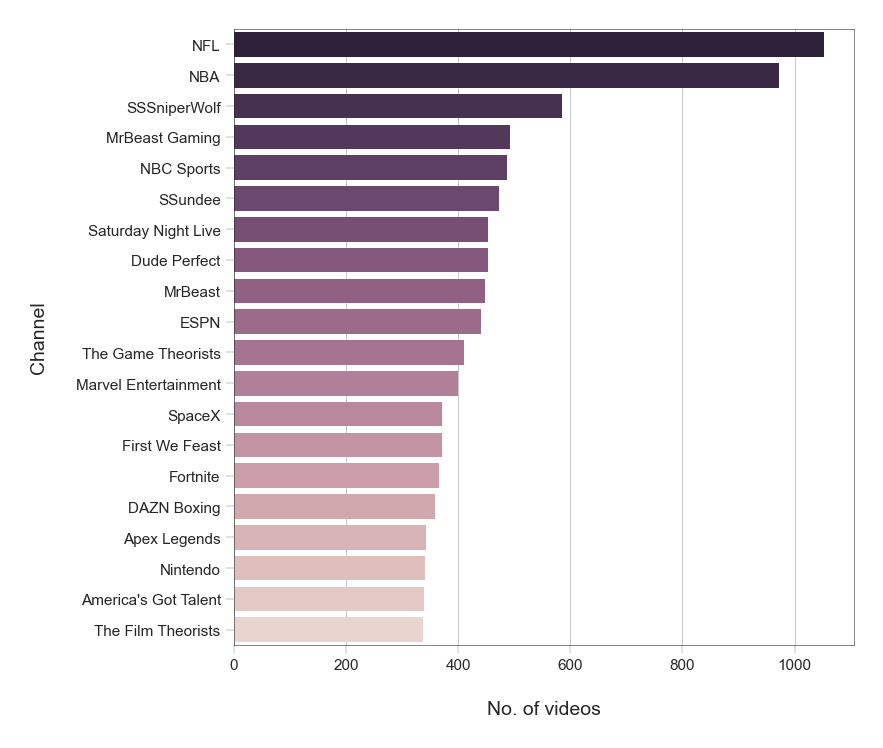

In [27]:
# Which channels have the largest number of trending videos?
cdf = df.groupby("channelTitle").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channelTitle", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

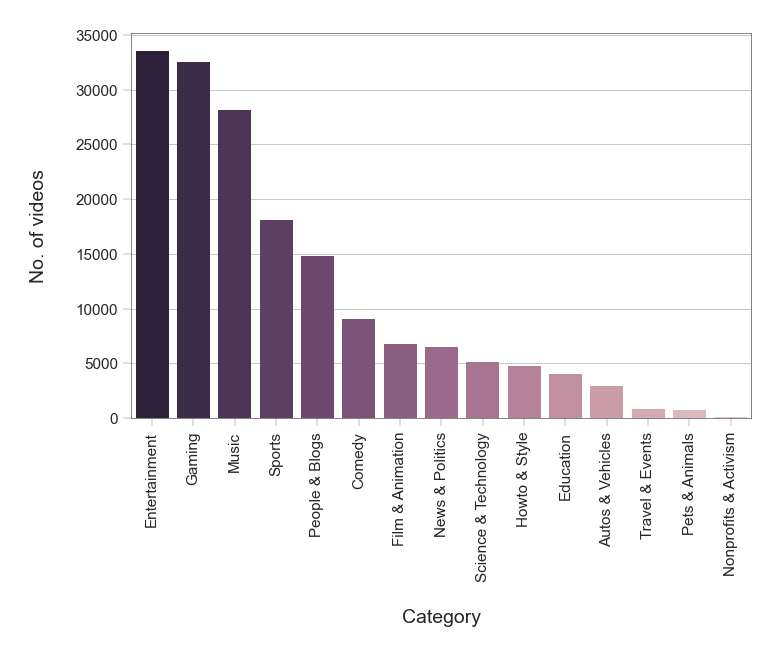

In [29]:
# Which video category has the largest number of trending videos?
with open("../data_input/US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['categoryId'].map(cat_dict)

cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")


In [30]:
# Trending videos and their publishing time 
# Adding two columns to represent the date and hour of publishing each video
df["publishing_day"] = df["publishedAt"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publishedAt"].apply(lambda x: x[11:13])

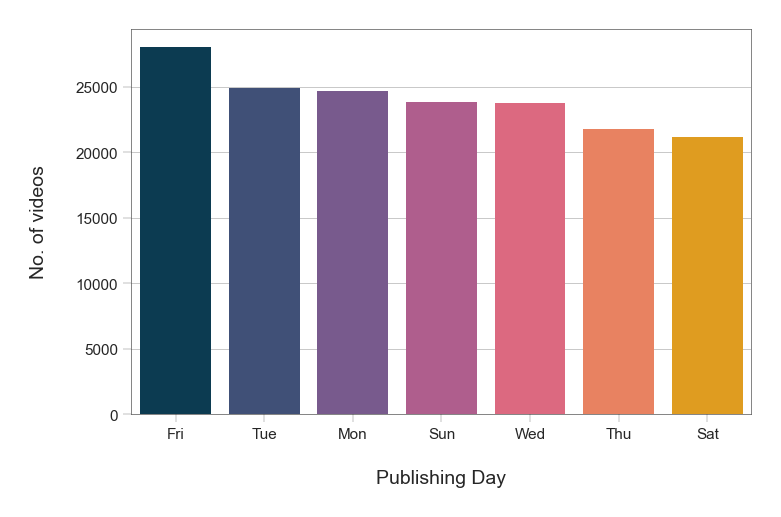

In [31]:
# Which days of the week had the most trending videos ？
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

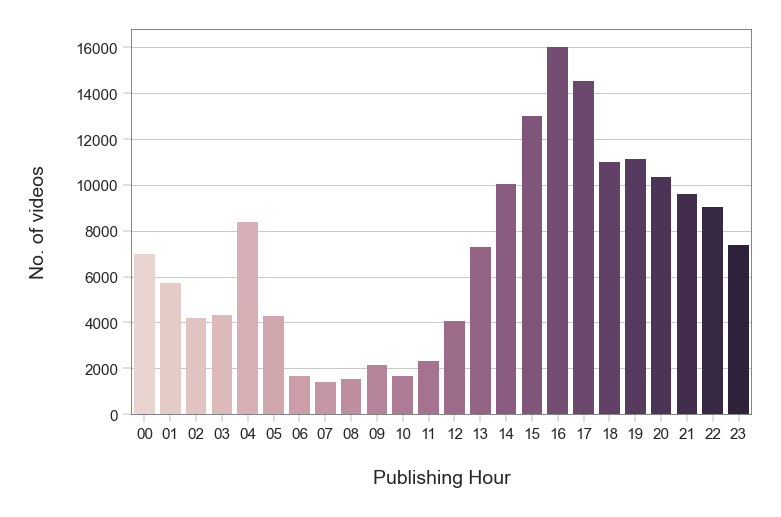

In [32]:
# Which publishing hours had the largest number of trending videos?
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
df["publishing_hour"] = df["publishedAt"].apply(lambda x: x[11:13])
df.drop(labels='publishedAt', axis=1, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

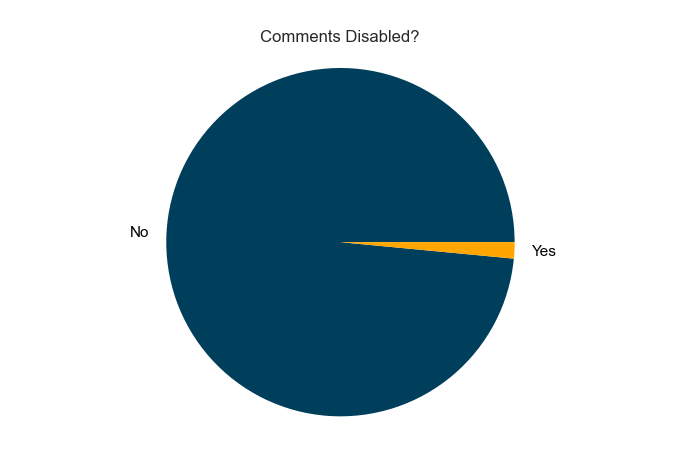

In [33]:
# How many trending videos have their commets disabled?
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

In [34]:
# Percentage of trending videos that users cannot comment on
df["comments_disabled"].value_counts(normalize=True)

False   0.98
True    0.02
Name: comments_disabled, dtype: float64

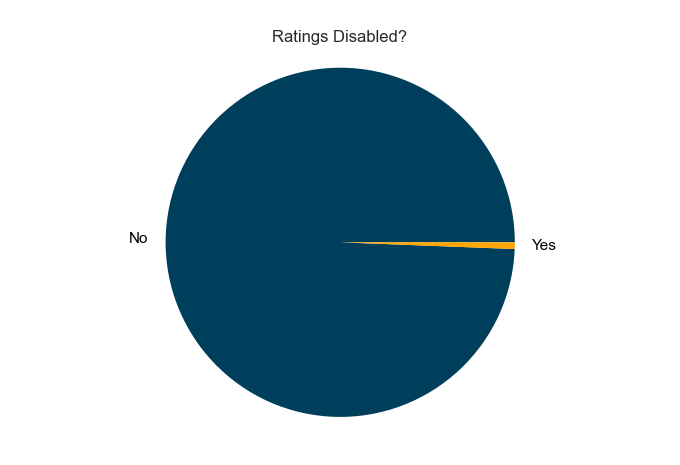

In [35]:
# How many trending videos have their ratings disabled?
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
            colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')


In [36]:
# Percentage of trending videos that users could not rate
df["ratings_disabled"].value_counts()

False    166958
True       1032
Name: ratings_disabled, dtype: int64